# Project 2 
# Telecom Customer Churn Prediction
 

# Task and Goal
**The goal of this project is to create an application for the use of the marketing / product
development and sales teams of a telecommunication company. This application uses
customer churn data and returns graphs and figures with insights that can lead to
developments of products and a marketing plan aimed towards customers that are likely
to stay with the company for longer. It can also be used to develop a sales strategy that
helps customers choose products appropriate for them, so they do not become unhappy
with their service and leave.**


**Data Background
To make this project you can use IBM’s public sample set called “Telecom Customer
Churn”. The dataset is meant to simulate a typical dataset of a Telecommunications
company..
The dataset contains 7043 observations (rows) and 22 variables (columns) that contain
information about customer demographics (gender, senior citizenship status, children,
and marital status), services they signed up for (phone line, multiple lines, online
security, online backup, device protection, tech support, streaming TV and Movies),
account information (type of contract, payment type, paperless billing, monthly and total
charges), and churn (which customers left within the past month when the data was
collected).**

 **Using telecom dataset to recognize the features to build a ML model that can predict
whether a customer is going to churn out or remain in the company.
Also, if the customer remains with the company then build a model to predict the
possible revenue that company can generate from them**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# reading csv file

data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


 # Pre-processing of data

In [63]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [65]:
# total no. of rows and columns in the dataset

data.shape

(7043, 21)

In [66]:
data.size

147903

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [69]:
# reading columns from the dataset

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
# dtypes of the columns from dataset

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
# convert TotalCharges to numeric dtype & checking for null values in the data

data.TotalCharges =pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
# data type of each column of dataset

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [73]:
# Removing missing values

data.dropna(inplace=True)

In [74]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now there are no missing values in the data.

One of the most important data is churn status of each customer. Let's print the number of customer that churned(Yes) and not churned(No)



In [75]:
# Count of customer that will churn
churn_count = data[data.Churn == 'Yes'].shape[0]

# Count of customer that will not churn (retain)
retain_count = data[data.Churn == 'No'].shape[0]

In [76]:
churn_count

1869

In [77]:
retain_count

5163

In [78]:
# Percentage of customer that will churn
churn_percentage= round((churn_count / (churn_count + retain_count) * 100),2)

# Percentage of customer that will not churn (retain)
retain_percentage = round((retain_count / (churn_count + retain_count ) * 100 ),2)

In [79]:
## Checking the Churn Rate

print('The churn rate is',churn_percentage,'% .')

The churn rate is 26.58 % .


In [80]:
## Checking the retain Rate

print('The retain rate is',retain_percentage,'% .')

The retain rate is 73.42 % .


# Data Visualization & Analysis

C:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '26.58 % of customers will churn & 73.42 %  of customers will retain')

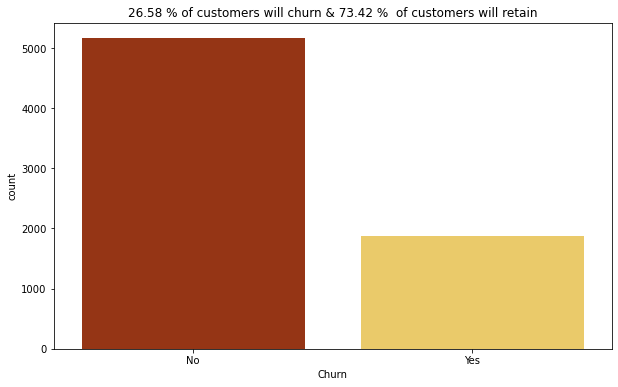

In [81]:
# plotting the churn count

plt.figure(figsize=(10,6))
sns.countplot(data['Churn'],palette='afmhot')
plt.title(f'{churn_percentage } % of customers will churn & {retain_percentage} %  of customers will retain')

Now let's look at the effect of other available features on the customer retention

Lets see the effect of gender on customer churn

Text(0.5, 1.0, 'Effect of Gender on customer churn')

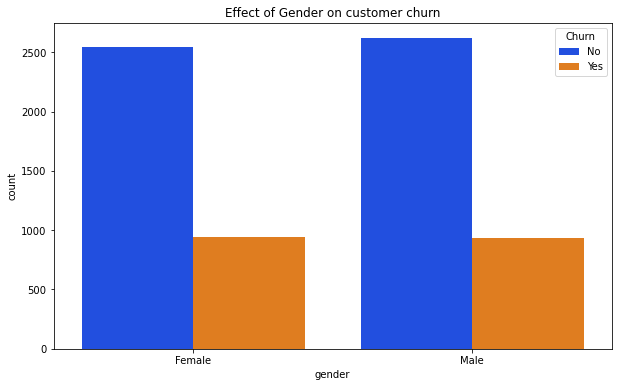

In [82]:
# churn count based on gender

plt.figure(figsize=(10,6))
sns.countplot(x= 'gender', hue='Churn', data=data, palette="bright")
plt.title('Effect of Gender on customer churn')

customer gender doesn't seem to affecting churn count. Since we have separate columns for senior citizens let check the churn rate for them.

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

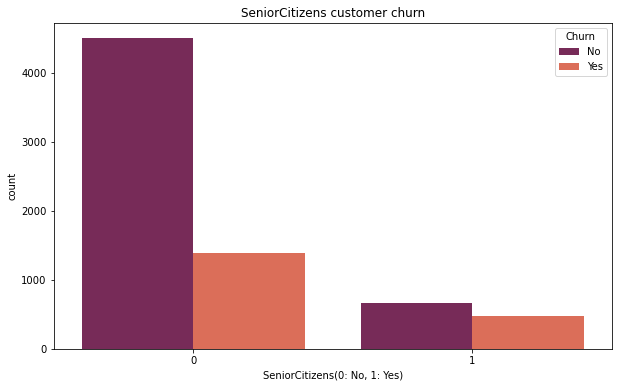

In [83]:
# churn count based on senior citizens

plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=data, palette="rocket")
ax.set_title(f'SeniorCitizens customer churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

**As we can see from above graph that senior citizens though being few in number have higher customer churn percentage.**

**Now let check the effect of internet service on churn count.**

Text(0.5, 1.0, 'Effect of internet service on customer churn')

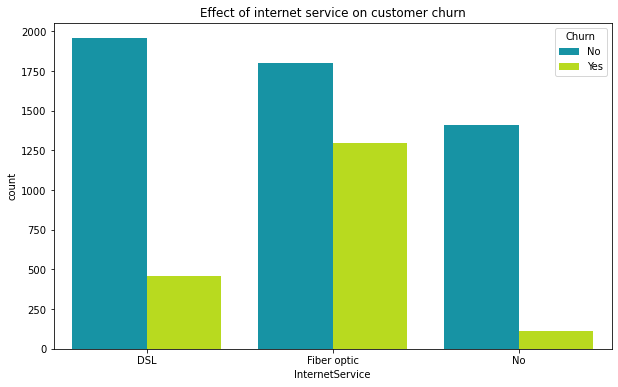

In [84]:
# churn count based on internet service

plt.figure(figsize=(10,6))
sns.countplot(x= 'InternetService', hue='Churn', data=data,palette="nipy_spectral")
plt.title(f'Effect of internet service on customer churn')

**we can see from above graph that customers who are using DSL internet service tends to be more loyal as compare
to fiber optic using customers. Also note that if customers are not using no internet service then churn count reduces even further.**

**Now let's have a look at the effect of tenure on customer churn.**

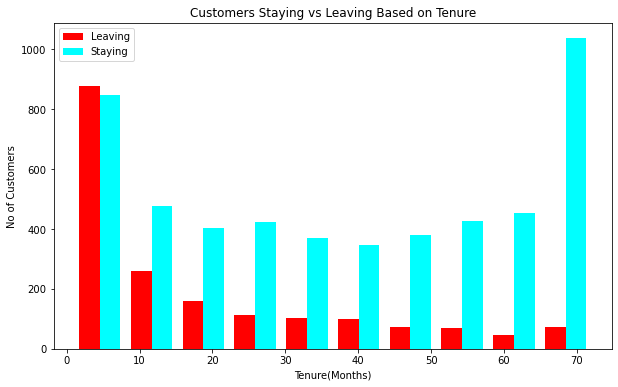

In [85]:
# churn count based on tenure

tenure_yes = data[data.Churn == 'Yes'].tenure
tenure_no = data[data.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_yes, tenure_no], color=['red', 'cyan'], label= ['Leaving', 'Staying'])
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Tenure')
plt.legend() ## for hue

**From above histogram it's clear that more number of customers tend to stay with the company after the first 10 months of service.**

**Let also visualize the customer churn with respect to monthly charges.**

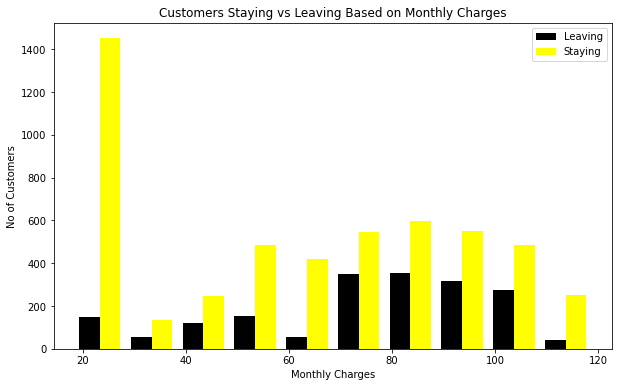

In [86]:
# churn count based on monthly charges
monthly_charges_churn_yes = data[data.Churn == 'Yes'].MonthlyCharges
monthly_charges_churn_no = data[data.Churn == 'No'].MonthlyCharges
plt.figure(figsize=(10,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['black', 'yellow'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Monthly Charges')
plt.legend()

**As we can see from above histogram for lowest monthly rates(between 20 and 40) highest is the customer retention. But customer retention increases for monthly charges between 70 and 100. So the company can reduce the monthly charges or add more value to the service for the same price to increase the customer retention.**

# Transform Categorical Values

In [87]:
# drop customerID column

data=data.drop(columns=(['customerID']))

In [88]:
# Convertion of the predictor variable in a binary numeric variable.

data.replace('No internet service', 'No', inplace = True)
data.replace('No phone service', 'No', inplace = True)
data['Churn'].replace({'Yes': 1,'No': 0},inplace=True)


In [89]:
# convert all the categorical variables into 0 & 1.

df = pd.get_dummies(data)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [90]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [91]:
# Dropping un-necessory columns

df=df.drop(columns=['MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes',])

In [92]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Create feature without label column 'Churn'
x= df.drop('Churn',axis = 'columns')

# Create label vector y
y= df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 50)

# training datatset
x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6403,0,72,116.60,8337.45,0,1,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
1677,0,6,25.40,153.30,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2723,0,21,20.50,402.85,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1192,0,7,90.45,593.45,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3638,1,2,50.15,115.10,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


# Modeling 


# Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

# creating the instance of LR

model= LogisticRegression()

In [96]:
model.fit(x_train,y_train)

C:\Users\ASUS\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
x_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4460,0,18,78.20,1468.75,0,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
733,0,72,79.05,5730.70,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5514,0,1,48.45,48.45,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
5864,0,47,19.65,921.55,1,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
916,1,23,75.40,1643.55,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,0,6,69.80,377.85,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5171,0,12,45.90,505.95,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
6540,0,34,64.35,2053.05,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
3130,0,24,74.40,1712.90,0,1,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0


In [98]:
model.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:

model.predict_proba(x_test)


array([[0.70588466, 0.29411534],
       [0.97808301, 0.02191699],
       [0.53529906, 0.46470094],
       ...,
       [0.88457873, 0.11542127],
       [0.90601763, 0.09398237],
       [0.98217875, 0.01782125]])

In [100]:
y_predicted = model.score(x_test,y_test)
y_predicted

0.8137882018479033

In [101]:
model.coef_

array([[ 2.65203915e-01, -6.14822436e-02,  2.33458263e-02,
         2.99743134e-04, -1.73179447e-01, -1.63868722e-01,
        -1.79133038e-01, -1.57915131e-01, -9.27770306e-02,
        -2.44271138e-01,  2.70028492e-01, -6.07076661e-01,
        -1.09375223e-01, -2.27672946e-01,  1.61872913e-01,
        -4.98921082e-01, -1.79654756e-01, -1.57393413e-01,
        -1.88955505e-01, -1.48092664e-01,  5.43674101e-01,
        -2.74879125e-01, -6.05843145e-01, -3.83256936e-01,
         4.62087673e-02, -1.07428051e-01, -2.52859557e-01,
         2.61487046e-01, -2.38247607e-01]])

In [102]:
model.intercept_

array([-0.33975319])

In [103]:
# Accuracy of model on training dataset 

print("Training Accuracy is : ", model.score(x_train, y_train)*100)

Training Accuracy is :  79.64444444444445


Training Accuracy is :   79.48

In [104]:
# Accuracy of model on testing dataset

print(" Testing Accuracy is : ",model.score(x_test , y_test)*100)

 Testing Accuracy is :  81.37882018479033


 Testing Accuracy is :  81.02 %

Now let's print the confusion matrix for better visualization.

In [105]:
# confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm



array([[954, 105],
       [157, 191]], dtype=int64)

Text(33.0, 0.5, 'Truth')

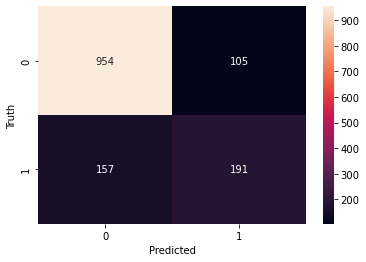

In [106]:
# represeting confusion matrix in heatmap form to understand it better

sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [108]:
print("Training accuracy is : ", model.score(x_train, y_train)*100)


Training accuracy is :  99.71555555555555


In [109]:
print("Testing ccuracy is : ",model.score(x_test , y_test)*100)

Testing ccuracy is :  79.67306325515281


In [110]:
y_pred_model= model.predict(x_test) 
x_pred_model= model.predict(x_train)

In [111]:
model_dif = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_dif

,Actual value,Predicted value
4460,0,0
733,0,0
5514,0,1
5864,0,0
916,0,1
...,...,...
5025,0,1
5171,0,0
6540,0,0
3130,0,0


# Decision tree classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

mod= DecisionTreeClassifier()

In [113]:
mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
print("Training accuracy is : ", mod.score(x_train, y_train)*100)

Training accuracy is :  99.71555555555555


In [115]:
print("Testing Accuracy is : ",mod.score(x_test , y_test)*100)

Testing Accuracy is :  70.50461975835111
